## Visualization Package \( Seaborn and Plotly\)



In [72]:
import plotly.express as px
import seaborn as sns
import pandas as pd
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots


In [17]:
# import the iris dataset
iris = pd.read_csv('iris.csv')
iris.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
print('Features for Iris: ')
print(iris.columns[:-1], '\n')
print('Different Type of Iris: ')
print(iris['class'].unique(), '\n')


Features for Iris: 
Index(['sepallength', 'sepalwidth', 'petallength', 'petalwidth'], dtype='object') 

Different Type of Iris: 
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica'] 



### Use Seaborn Heatmap to plot the correlation between features



In [19]:
X = iris.iloc[:, 0:4]
X

,sepallength,sepalwidth,petallength,petalwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


<AxesSubplot:>

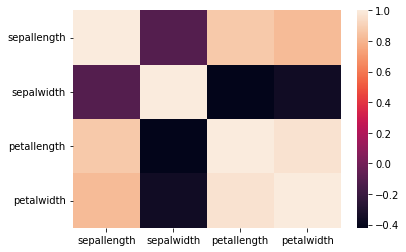

In [22]:
sns.heatmap(X.corr())

### Use Plotly Heatmap to plot the correlation between features



In [25]:
px.imshow(X.corr())

### Scatter Plot



In [27]:
fig = px.scatter(x = iris['sepallength'], y = iris['petallength'])
fig

In [29]:
fig = px.scatter(x = iris['sepallength'], y = iris['petallength'], color = iris['class'])
fig

In [31]:
fig = px.scatter(x = iris['sepallength'], y = iris['petallength'], color = iris['class'], size = iris['sepalwidth'])
fig

In [35]:
fig = px.scatter_matrix(iris,
    dimensions=["sepalwidth", "sepallength", "petalwidth", "petallength"],
    color="class")
fig

### Histogram Plot



In [38]:
fig = px.histogram(x = iris['sepallength'], y = iris['petallength'])
fig

In [42]:
iris['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [43]:
px.histogram(iris['class'])

In [44]:
fig = px.histogram(iris, x = 'sepallength', color='class')
fig

In [47]:
fig = px.histogram(iris, x = 'sepallength', color='class', marginal="violin") # different value for "marginal" : rug, box or violin
fig

### Pie Chart



In [55]:
#df = px.data.tips()
fig = px.pie(iris, values='sepallength', names='class', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

### Box plot \( Detect the outlier \)



In [57]:
fig = px.box(iris, x = 'class', y = 'sepallength')
fig

In [58]:
fig = px.box(iris, x = 'class', y = 'sepallength', points ='all')
fig

In [64]:
# create a space for plot
fig = go.Figure()
# add figure on the plot


fig.add_trace(go.Box(y=iris['sepallength'], name="Sepal length"))
fig.add_trace(go.Box(y=iris['sepalwidth'], name="Sepal width"))
fig.add_trace(go.Box(y=iris['petallength'], name="Petal length"))
fig.add_trace(go.Box(y=iris['petalwidth'], name="Petal width"))

fig.show()

### Distribution of the features



In [71]:
hist_data = [iris['sepallength'], iris['sepalwidth'], iris['petallength'], iris['petalwidth']]
group_labels = ['sepallength', 'sepalwidth', 'petallength', 'petalwidth']

fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)
fig.show()

### How to make subplots?



In [93]:
fig = make_subplots(rows=1, cols=3)

fig.add_trace(
    go.Scatter(x=iris['sepallength'], y=iris['sepalwidth'], name = 'sl v.s sw'),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(x=iris['sepallength'], y=iris['petalwidth'], name = 'sl v.s pw'),
    row=1, col=2
)

fig.add_trace(
    go.Bar(x=iris['sepallength'], y=iris['petallength'], name = 'sl v.s pl'),
    row=1, col=3
)

fig.update_layout(height=600, width=1200, title_text="Correlation between sepallength and others")
fig.show()

In [0]:
fi